In [36]:
import pandas as pd, math, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

## Importação e tratamento dos dados

In [37]:

path = r'C:\Users\Davi\Documents\Projetos\FIAP\FASE 4\Cap3\documents\seeds_dataset.txt'

df = pd.read_csv(r"C:\Users\Davi\Documents\Projetos\FIAP\FASE 4\Cap3\documents\seeds_dataset.txt", sep='\s+')
df.columns = ['AREA', 'PERIMETRO', 'COMPACIDADE', 'COMPRIMENTO DO NUCLEO', 'LARGURA DO NUCLEO', 'COEFICIENTE DE ASSIMETRIA', 'COMPRIMENTO DO SULCO DO NUCLEO', 'AMOSTRA']

df['AMOSTRA'] = df['AMOSTRA'].map({1:'Kama', 2:'Rosa', 3:'Canadian'})

## Identificação e tratativa de valorez vaizos
for col in df.columns:
    for a in df[col].isna():
        if a == True:
            print({col:a})
            df = df.fillna({col:0.0})


display(df)

,AREA,PERIMETRO,COMPACIDADE,COMPRIMENTO DO NUCLEO,LARGURA DO NUCLEO,COEFICIENTE DE ASSIMETRIA,COMPRIMENTO DO SULCO DO NUCLEO,AMOSTRA
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


## Definindo media


In [38]:
media = {
    'AREA':[], 
    'PERIMETRO':[], 
    'COMPACIDADE':[], 
    'COMPRIMENTO DO NUCLEO':[], 
    'LARGURA DO NUCLEO':[], 
    'COEFICIENTE DE ASSIMETRIA':[], 
    'COMPRIMENTO DO SULCO DO NUCLEO':[], 
    'AMOSTRA':['Kama', 'Rosa', 'Canadian']
    }
# media['AREA'] = float(df.loc[df['AMOSTRA'] == 1, 'AREA'].mean())
media['AREA'] = [float(df.loc[df['AMOSTRA'] == a, 'AREA'].mean()) for a in range(1, 4)]
media['PERIMETRO'] = [float(df.loc[df['AMOSTRA'] == a, 'PERIMETRO'].mean()) for a in range(1, 4)]
media['COMPACIDADE'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPACIDADE'].mean()) for a in range(1, 4)]
media['COMPRIMENTO DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPRIMENTO DO NUCLEO'].mean()) for a in range(1, 4)]
media['LARGURA DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'LARGURA DO NUCLEO'].mean()) for a in range(1, 4)]
media['COEFICIENTE DE ASSIMETRIA'] = [float(df.loc[df['AMOSTRA'] == a, 'COEFICIENTE DE ASSIMETRIA'].mean()) for a in range(1, 4)]
media['COMPRIMENTO DO SULCO DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPRIMENTO DO SULCO DO NUCLEO'].mean()) for a in range(1, 4)]
# del m
print(media)

{'AREA': [nan, nan, nan], 'PERIMETRO': [nan, nan, nan], 'COMPACIDADE': [nan, nan, nan], 'COMPRIMENTO DO NUCLEO': [nan, nan, nan], 'LARGURA DO NUCLEO': [nan, nan, nan], 'COEFICIENTE DE ASSIMETRIA': [nan, nan, nan], 'COMPRIMENTO DO SULCO DO NUCLEO': [nan, nan, nan], 'AMOSTRA': ['Kama', 'Rosa', 'Canadian']}


## Definindo mediana

In [39]:
mediana = {
    'AREA':[], 
    'PERIMETRO':[], 
    'COMPACIDADE':[], 
    'COMPRIMENTO DO NUCLEO':[], 
    'LARGURA DO NUCLEO':[], 
    'COEFICIENTE DE ASSIMETRIA':[], 
    'COMPRIMENTO DO SULCO DO NUCLEO':[], 
    'AMOSTRA':['Kama', 'Rosa', 'Canadian']
    }

mediana['AREA'] = [float(df.loc[df['AMOSTRA'] == a, 'AREA'].median()) for a in range(1, 4)]
mediana['PERIMETRO'] = [float(df.loc[df['AMOSTRA'] == a, 'PERIMETRO'].median()) for a in range(1, 4)]
mediana['COMPACIDADE'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPACIDADE'].median()) for a in range(1, 4)]
mediana['COMPRIMENTO DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPRIMENTO DO NUCLEO'].median()) for a in range(1, 4)]
mediana['LARGURA DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'LARGURA DO NUCLEO'].median()) for a in range(1, 4)]
mediana['COEFICIENTE DE ASSIMETRIA'] = [float(df.loc[df['AMOSTRA'] == a, 'COEFICIENTE DE ASSIMETRIA'].median()) for a in range(1, 4)]
mediana['COMPRIMENTO DO SULCO DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPRIMENTO DO SULCO DO NUCLEO'].median()) for a in range(1, 4)]

print(mediana)

{'AREA': [nan, nan, nan], 'PERIMETRO': [nan, nan, nan], 'COMPACIDADE': [nan, nan, nan], 'COMPRIMENTO DO NUCLEO': [nan, nan, nan], 'LARGURA DO NUCLEO': [nan, nan, nan], 'COEFICIENTE DE ASSIMETRIA': [nan, nan, nan], 'COMPRIMENTO DO SULCO DO NUCLEO': [nan, nan, nan], 'AMOSTRA': ['Kama', 'Rosa', 'Canadian']}


## Definindo desvio padrão

In [40]:
mediana = {
    'AREA':[], 
    'PERIMETRO':[], 
    'COMPACIDADE':[], 
    'COMPRIMENTO DO NUCLEO':[], 
    'LARGURA DO NUCLEO':[], 
    'COEFICIENTE DE ASSIMETRIA':[], 
    'COMPRIMENTO DO SULCO DO NUCLEO':[], 
    'AMOSTRA':['Kama', 'Rosa', 'Canadian']
    }

mediana['AREA'] = [float(df.loc[df['AMOSTRA'] == a, 'AREA'].std()) for a in range(1, 4)]
mediana['PERIMETRO'] = [float(df.loc[df['AMOSTRA'] == a, 'PERIMETRO'].std()) for a in range(1, 4)]
mediana['COMPACIDADE'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPACIDADE'].std()) for a in range(1, 4)]
mediana['COMPRIMENTO DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPRIMENTO DO NUCLEO'].std()) for a in range(1, 4)]
mediana['LARGURA DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'LARGURA DO NUCLEO'].std()) for a in range(1, 4)]
mediana['COEFICIENTE DE ASSIMETRIA'] = [float(df.loc[df['AMOSTRA'] == a, 'COEFICIENTE DE ASSIMETRIA'].std()) for a in range(1, 4)]
mediana['COMPRIMENTO DO SULCO DO NUCLEO'] = [float(df.loc[df['AMOSTRA'] == a, 'COMPRIMENTO DO SULCO DO NUCLEO'].std()) for a in range(1, 4)]

print(mediana)

{'AREA': [nan, nan, nan], 'PERIMETRO': [nan, nan, nan], 'COMPACIDADE': [nan, nan, nan], 'COMPRIMENTO DO NUCLEO': [nan, nan, nan], 'LARGURA DO NUCLEO': [nan, nan, nan], 'COEFICIENTE DE ASSIMETRIA': [nan, nan, nan], 'COMPRIMENTO DO SULCO DO NUCLEO': [nan, nan, nan], 'AMOSTRA': ['Kama', 'Rosa', 'Canadian']}


## Boxplot

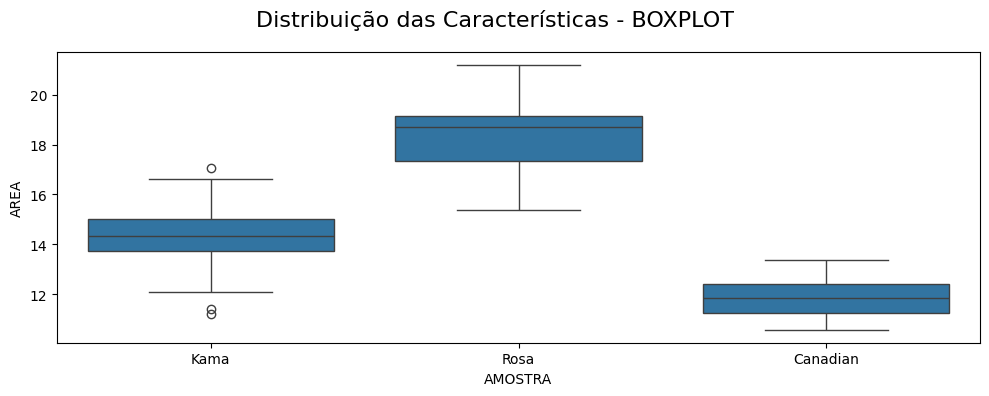

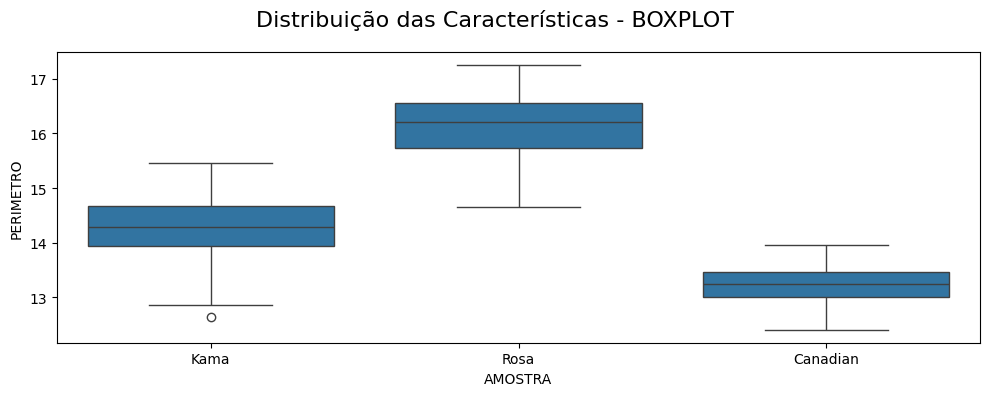

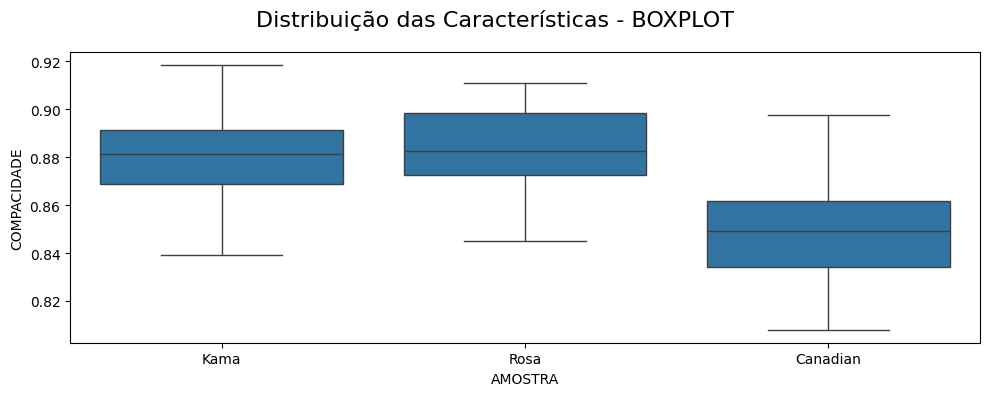

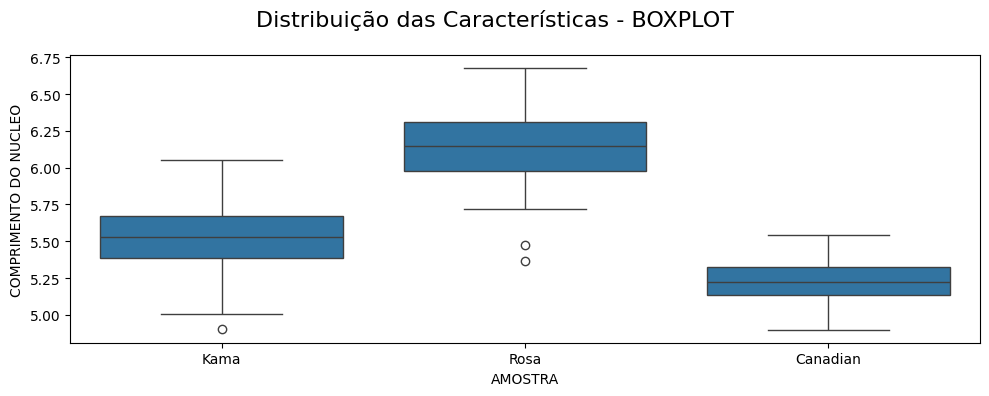

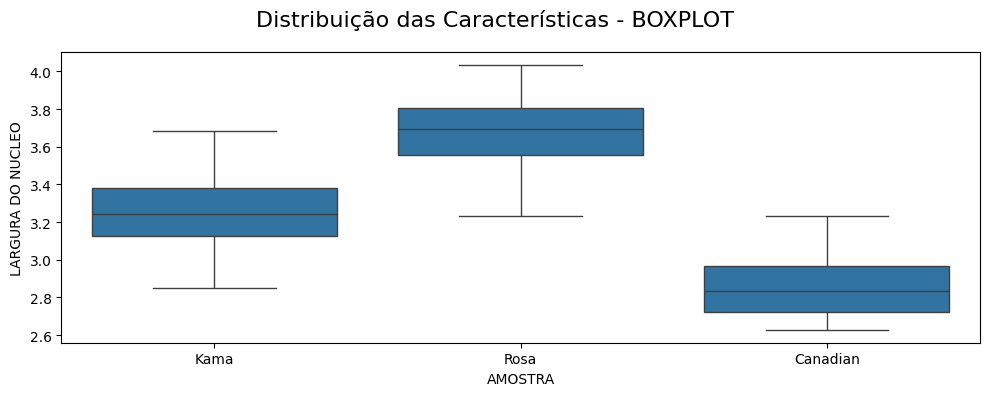

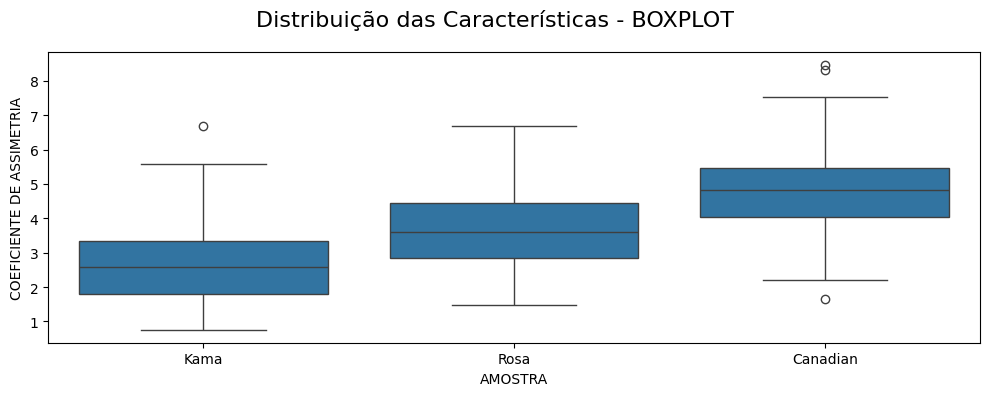

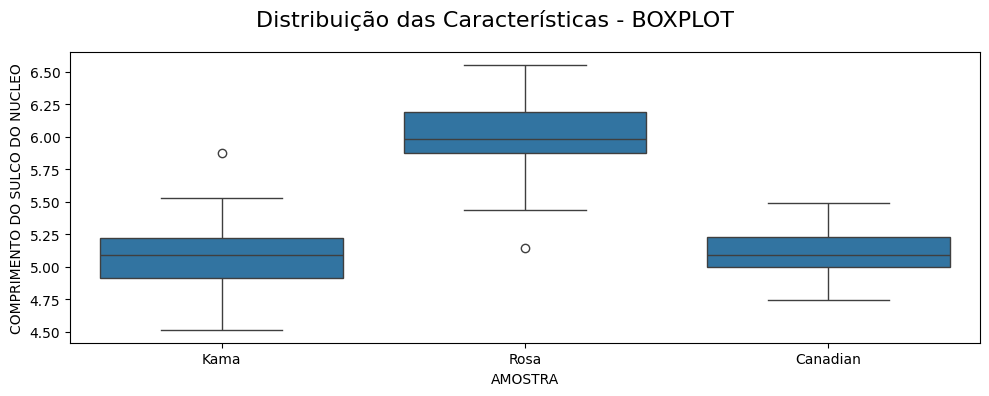

In [41]:
for col in df.columns:
    if col != 'AMOSTRA':
        plt.figure(figsize=(10,4))
        sns.boxplot(x=df['AMOSTRA'], y=df[col])
        plt.suptitle('Distribuição das Características - BOXPLOT', fontsize=16)
        plt.tight_layout()
        plt.show()

## Histograma

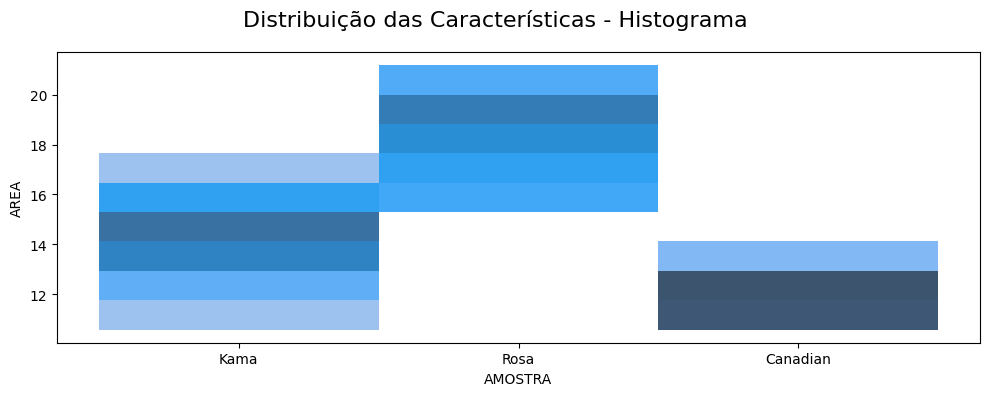

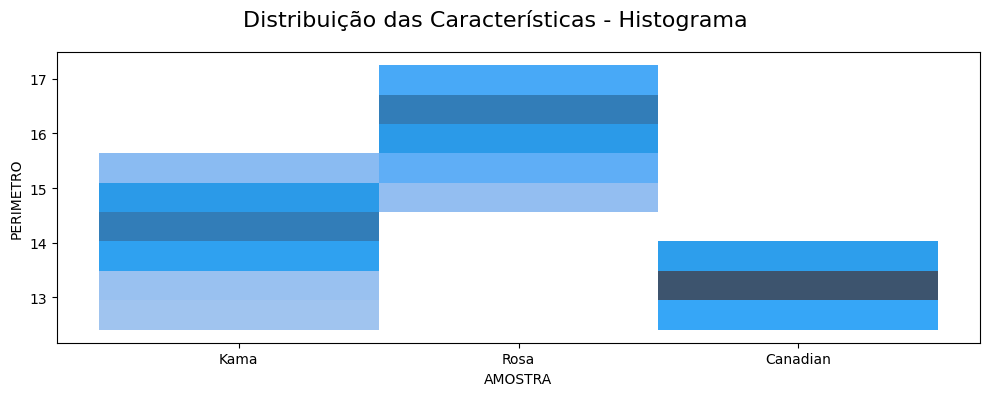

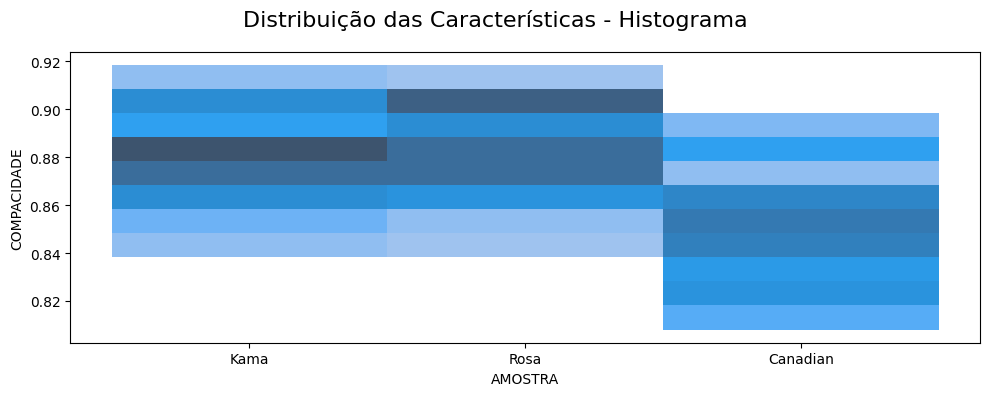

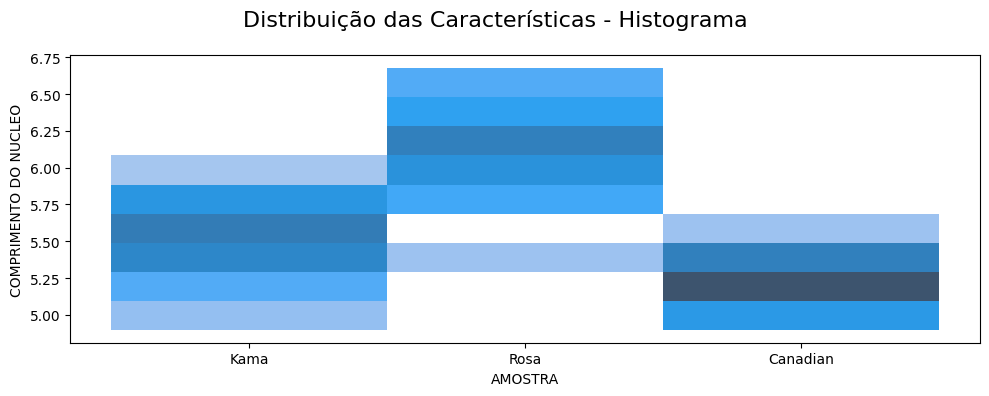

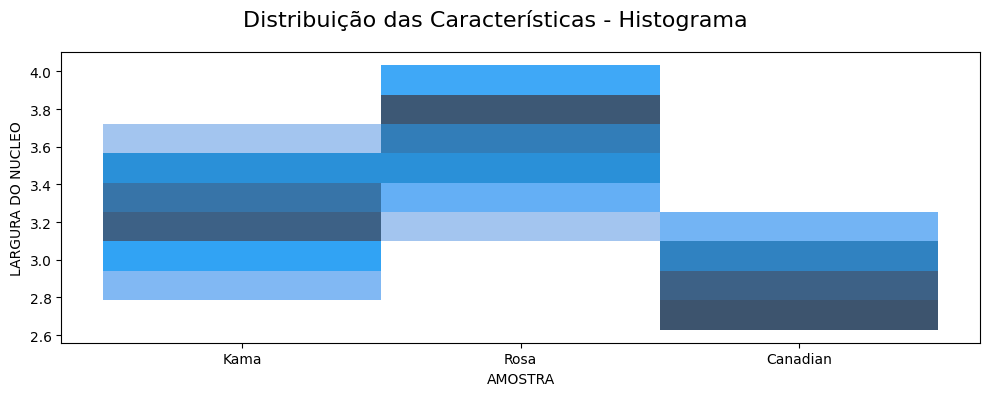

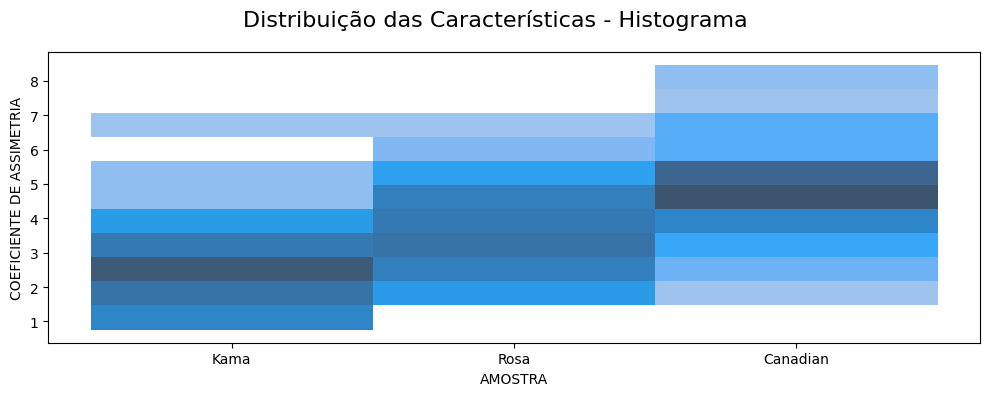

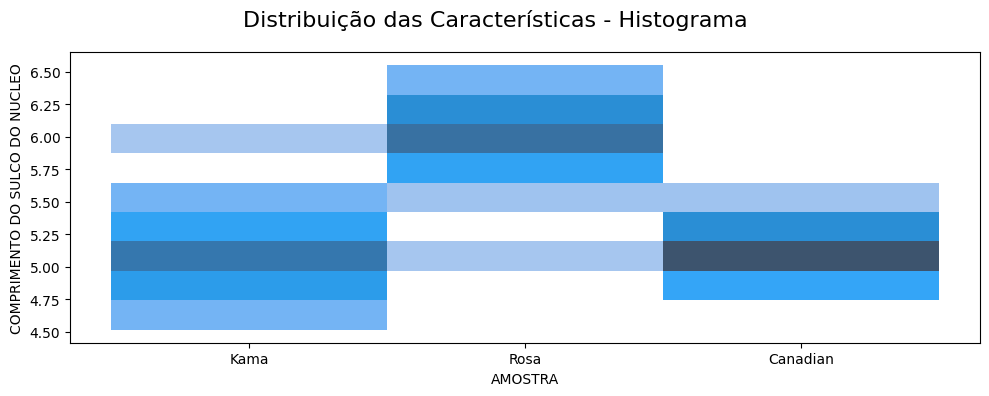

In [42]:
for col in df.columns:
    if col != 'AMOSTRA':
        plt.figure(figsize=(10,4))
        sns.histplot(x=df['AMOSTRA'], y=df[col])
        plt.suptitle('Distribuição das Características - Histograma', fontsize=16)
        plt.tight_layout()
        plt.show()

## Dispersão de caracteristicas

### AREA x PERIMETRO

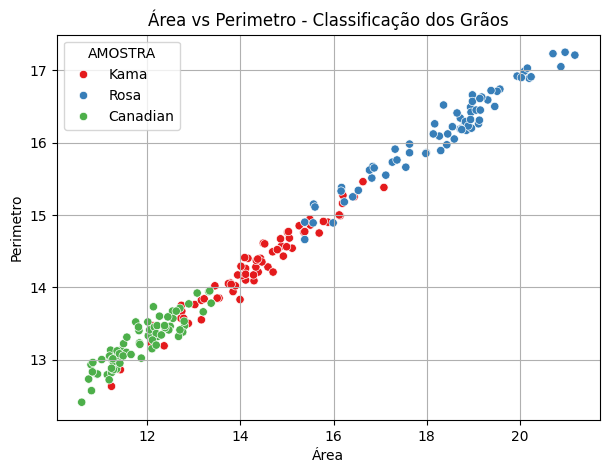

In [43]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='AREA', y='PERIMETRO', hue='AMOSTRA', palette='Set1')
plt.title('Área vs Perimetro - Classificação dos Grãos')
plt.xlabel('Área')
plt.ylabel('Perimetro')
plt.grid(True)
plt.show()

### AREA X COMPRIMENTO DO NUCLEO

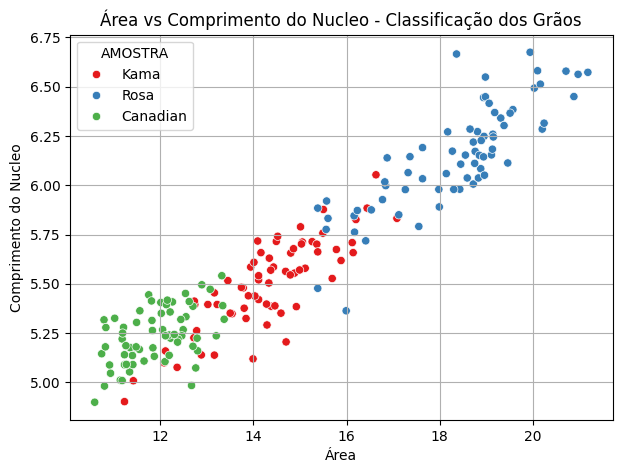

In [44]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='AREA', y='COMPRIMENTO DO NUCLEO', hue='AMOSTRA', palette='Set1')
plt.title('Área vs Comprimento do Nucleo - Classificação dos Grãos')
plt.xlabel('Área')
plt.ylabel('Comprimento do Nucleo')
plt.grid(True)
plt.show()

### COEFICIENTE DE ASSIMETRIA X COMPRIMENTO DO NUCLEO

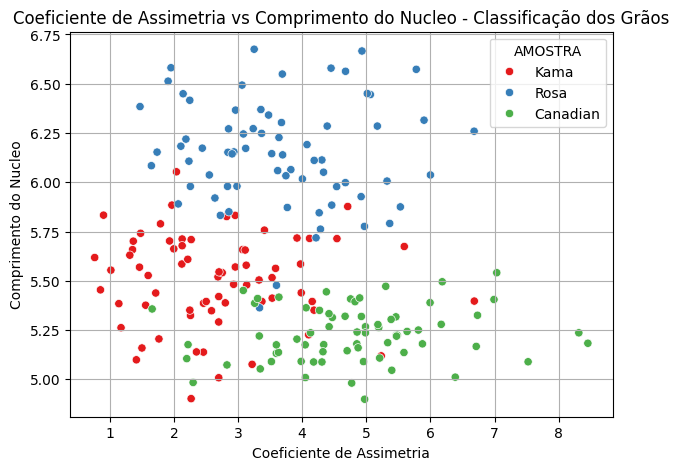

In [45]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='COEFICIENTE DE ASSIMETRIA', y='COMPRIMENTO DO NUCLEO', hue='AMOSTRA', palette='Set1')
plt.title('Coeficiente de Assimetria vs Comprimento do Nucleo - Classificação dos Grãos')
plt.xlabel('Coeficiente de Assimetria')
plt.ylabel('Comprimento do Nucleo')
plt.grid(True)
plt.show()

## Separação de conjuntos de treino e teste

In [46]:
x_test, x_train, y_test, y_train = train_test_split(df[['AREA', 'PERIMETRO', 'COMPACIDADE', 'COMPRIMENTO DO NUCLEO', 'LARGURA DO NUCLEO', 'COEFICIENTE DE ASSIMETRIA', 'COMPRIMENTO DO SULCO DO NUCLEO']], df['AMOSTRA'], train_size=0.3, random_state=30)
print(f'COMPRIMENTO MODELO DE TREINO (X): {len(x_train)}')
print(f'COMPRIMENTO MODELO DE TESTE (X): {len(x_test)}')
print(f'COMPRIMENTO MODELO DE TREINO (y): {len(y_train)}')
print(f'COMPRIMENTO MODELO DE TESTE (y): {len(y_test)}')

COMPRIMENTO MODELO DE TREINO (X): 147
COMPRIMENTO MODELO DE TESTE (X): 62
COMPRIMENTO MODELO DE TREINO (y): 147
COMPRIMENTO MODELO DE TESTE (y): 62



## Treinamento dos modelos

### RandomForestClassifier

In [47]:
ml_rf = RandomForestClassifier()
ml_rf.fit(X=x_train, y=y_train)

RandomForestClassifier()

In [48]:
rf_predict = ml_rf.predict(x_test)

print("\nRelatório de Classificação:")
report_rdc = classification_report(y_test, rf_predict, output_dict=True)
print(report_rdc)


Relatório de Classificação:
{'Canadian': {'precision': 0.88, 'recall': 0.9565217391304348, 'f1-score': 0.9166666666666666, 'support': 23.0}, 'Kama': {'precision': 0.9047619047619048, 'recall': 0.8260869565217391, 'f1-score': 0.8636363636363636, 'support': 23.0}, 'Rosa': {'precision': 0.9375, 'recall': 0.9375, 'f1-score': 0.9375, 'support': 16.0}, 'accuracy': 0.9032258064516129, 'macro avg': {'precision': 0.907420634920635, 'recall': 0.9067028985507246, 'f1-score': 0.9059343434343434, 'support': 62.0}, 'weighted avg': {'precision': 0.9040245775729646, 'recall': 0.9032258064516129, 'f1-score': 0.9023704789833822, 'support': 62.0}}


### SVM

In [49]:
ml_scaler = StandardScaler()
x_scaler = ml_scaler.fit_transform(x_train)
df_scaled = pd.DataFrame(x_scaler, columns=['AREA', 'PERIMETRO', 'COMPACIDADE', 'COMPRIMENTO DO NUCLEO', 'LARGURA DO NUCLEO', 'COEFICIENTE DE ASSIMETRIA', 'COMPRIMENTO DO SULCO DO NUCLEO'])
ml_svm = SVC()
ml_svm.fit(x_train, y_train)



SVC()

In [50]:
y_pred = ml_svm.predict(x_test)

print("\nRelatório de Classificação:")
report_svm = classification_report(y_test, y_pred, output_dict=True)
print(report_svm)


Relatório de Classificação:
{'Canadian': {'precision': 0.8846153846153846, 'recall': 1.0, 'f1-score': 0.9387755102040817, 'support': 23.0}, 'Kama': {'precision': 0.8636363636363636, 'recall': 0.8260869565217391, 'f1-score': 0.8444444444444444, 'support': 23.0}, 'Rosa': {'precision': 0.9285714285714286, 'recall': 0.8125, 'f1-score': 0.8666666666666667, 'support': 16.0}, 'accuracy': 0.8870967741935484, 'macro avg': {'precision': 0.8922743922743924, 'recall': 0.8795289855072465, 'f1-score': 0.8832955404383975, 'support': 62.0}, 'weighted avg': {'precision': 0.8881763397892432, 'recall': 0.8870967741935484, 'f1-score': 0.8851729939287544, 'support': 62.0}}


### Native Bayes

In [51]:
ml_bayes = GaussianNB()
ml_bayes.fit(x_train, y_train)

GaussianNB()

In [52]:
bayes_predict = ml_bayes.predict(x_test)

print("\nRelatório de Classificação:")
report_bayes = classification_report(y_test, bayes_predict, output_dict=True)
print(report_bayes)


Relatório de Classificação:
{'Canadian': {'precision': 0.9166666666666666, 'recall': 0.9565217391304348, 'f1-score': 0.9361702127659575, 'support': 23.0}, 'Kama': {'precision': 0.8333333333333334, 'recall': 0.8695652173913043, 'f1-score': 0.851063829787234, 'support': 23.0}, 'Rosa': {'precision': 0.9285714285714286, 'recall': 0.8125, 'f1-score': 0.8666666666666667, 'support': 16.0}, 'accuracy': 0.8870967741935484, 'macro avg': {'precision': 0.8928571428571429, 'recall': 0.8795289855072465, 'f1-score': 0.8846335697399527, 'support': 62.0}, 'weighted avg': {'precision': 0.8888248847926268, 'recall': 0.8870967741935484, 'f1-score': 0.8866620910546785, 'support': 62.0}}


## Comparação de eficiencia entre os modelos

### Construção do dataframe
Com base nos dados extraidos dos modelos, construir um DataFrame de eficiencia dos modelos

In [90]:
cm_models_comparation = pd.DataFrame(
    { 
        'precision':[
            round(float(report_bayes['macro avg']['precision']*100),2), round(float(report_svm['macro avg']['precision']*100),2), round(float(report_rdc['macro avg']['precision']*100),2)
        ],
        'accuracy':[
            round(float(report_bayes['accuracy']*100),2), round(float(report_svm['accuracy']*100),2), round(float(report_rdc['accuracy']*100),2)
        ],
        'recall':[
            round(float(report_bayes['macro avg']['recall']*100),2), round(float(report_svm['macro avg']['recall']*100),2), round(float(report_rdc['macro avg']['recall']*100),2)
        ],
        'F1_score':[
            round(float(report_bayes['macro avg']['f1-score']*100),2), round(float(report_svm['macro avg']['f1-score']*100),2), round(float(report_rdc['macro avg']['f1-score']*100),2)
        ]
    },index=['Naive Bayes', 'SVM', 'RandomForestClassifier'] 
)
display(cm_models_comparation)

,precision,accuracy,recall,F1_score
Naive Bayes,89.29,88.71,87.95,88.46
SVM,89.23,88.71,87.95,88.33
RandomForestClassifier,90.74,90.32,90.67,90.59


### Representação gráfica

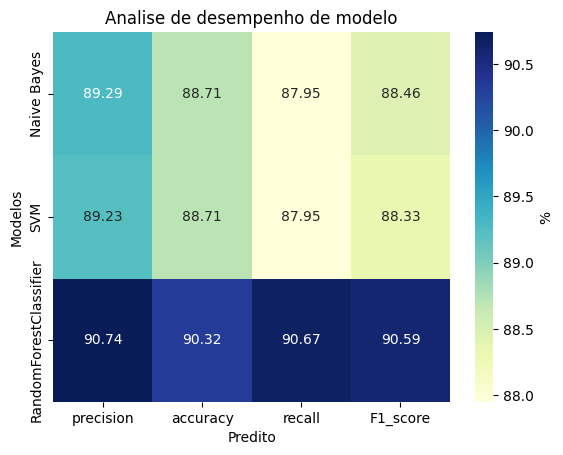

In [92]:
sns.heatmap(cm_models_comparation, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': '%'})
plt.title(f'Analise de desempenho de modelo')
plt.xlabel('Predito')
plt.ylabel('Modelos')
plt.show()